## Etude du benchmark par secteur

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
df = pd.read_csv("../data/filtered_CarbonIntensity.csv", sep=",")
df.head()

,ISSUER_ISIN,GICS_SUB_IND,GICS_SECTOR,EST_EU_TAXONOMY_MAX_REV,EU_TAXONOMY_ADAPTATION_ELIGIBLE_MAX_REV,EU_TAXONOMY_MITIGATION_ELIGIBLE_MAX_REV,GICS_SECTOR.1,Weight,CI_Scope12_FY09,CI_Scope12_FY10,...,CI_Scope12_FY41,CI_Scope12_FY42,CI_Scope12_FY43,CI_Scope12_FY44,CI_Scope12_FY45,CI_Scope12_FY46,CI_Scope12_FY47,CI_Scope12_FY48,CI_Scope12_FY49,CI_Scope12_FY50
0,US1264081035,Rail Transportation,Industrials,0.00,100.00,100.00,Industrials,0.001031,556.203960,514.354457,...,128.473717,121.013285,113.726624,106.607734,99.650886,92.850610,86.201678,79.699095,73.338080,67.114061
1,US1270971039,Oil & Gas Exploration & Production,Energy,0.00,0.00,0.00,Energy,0.000281,415.172641,415.173451,...,208.211269,205.674223,203.279769,201.016213,198.873108,196.841089,194.911736,193.077460,191.331404,189.667350
2,CA5592224011,Automotive Parts & Equipment,Consumer Discretionary,7.97,100.00,100.00,Consumer Discretionary,0.000191,34.523804,52.609566,...,47.988460,48.050545,48.110476,48.168362,48.224307,48.278406,48.330750,48.381422,48.430502,48.478063
3,US8326964058,Packaged Foods & Meats,Consumer Staples,0.00,0.00,0.00,Consumer Staples,0.000177,87.387982,84.450882,...,32.506223,32.009659,31.533281,31.075883,30.636352,30.213661,29.806862,29.415073,29.037480,28.673325
4,US8425871071,Electric Utilities,Utilities,6.41,33.34,33.34,Utilities,0.001427,7852.723472,7689.571772,...,424.351742,327.411370,234.070077,144.131084,57.411699,-26.257919,-107.035874,-185.069524,-260.496384,-333.444931


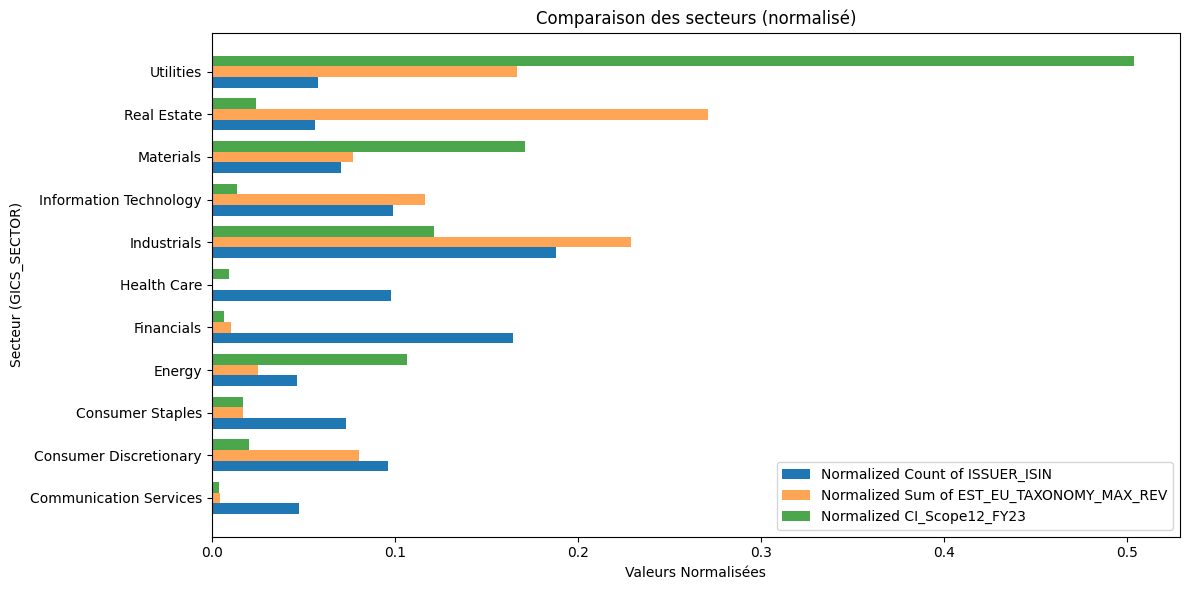

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Groupement des données par secteur
df_sector_count = df.groupby("GICS_SECTOR").count()
df_sector_sum = df.groupby("GICS_SECTOR").sum()

# Normalisation des colonnes
df_sector_count_normalized = df_sector_count["ISSUER_ISIN"] / df_sector_count["ISSUER_ISIN"].sum()
df_sector_sum_normalized = df_sector_sum["EST_EU_TAXONOMY_MAX_REV"] / df_sector_sum["EST_EU_TAXONOMY_MAX_REV"].sum()
df_sector_ci_normalized = df_sector_sum["CI_Scope12_FY09"] / df_sector_sum["CI_Scope12_FY09"].sum()

# Indices pour chaque secteur
sectors = df_sector_count.index
x = np.arange(len(sectors))  # Positions des barres sur l'axe des x

# Taille des barres
bar_width = 0.25  # Largeur des barres

# Création de la figure et des axes
fig, ax = plt.subplots(figsize=(12, 6))

# Barres pour ISSUER_ISIN normalisé
ax.barh(x - bar_width, df_sector_count_normalized, bar_width, label="Normalized Count of ISSUER_ISIN")

# Barres pour EST_EU_TAXONOMY_MAX_REV normalisé
ax.barh(x, df_sector_sum_normalized, bar_width, label="Normalized Sum of EST_EU_TAXONOMY_MAX_REV", alpha=0.7)

# Barres pour CI_Scope12_FY09 normalisé
ax.barh(x + bar_width, df_sector_ci_normalized, bar_width, label="Normalized CI_Scope12_FY23", alpha=0.7, color='green')

# Paramètres de l'axe des y
ax.set_yticks(x)
ax.set_yticklabels(sectors)

# Ajout des labels et de la légende
ax.set_xlabel("Valeurs Normalisées")
ax.set_ylabel("Secteur (GICS_SECTOR)")
ax.set_title("Comparaison des secteurs (normalisé)")
ax.legend()

# Afficher le graphique
plt.tight_layout()
plt.show()
